# Andes ieee39 vsg -- Trip Gen

Case: 'ieee14_vsg'  ---  a new REGCV1 (vsg-controlled inverter) connect to  BUS30, 38, 39 <br>
Disturbance: GENROU2 is tripped at 1s

Tips regarding andes:

1. static Gen is for power flow calculation, including 'PV' and 'Slack' <br>
dynamci Gen is for TDS, indlucing 'GENROW' and 'GENCAL'

2. Do not connect VSG to a GENROW <br>
VSG needs to share power from unit static gen


In [1]:
import andes
import os
import pandapower as pp

# andes and pandapower version
print(f'Andes version: {andes.__version__}')
print(f'Pandapower version: {pp.__version__}')

Andes version: 1.6.6
Pandapower version: 2.8.0


In [2]:
# Choose case
dir_path = os.path.abspath('..')
case_path = '/VIS_opf/ieee39_vis.xlsx'
case = dir_path + case_path

ssa = andes.load(case,
                 setup=True,
                 no_output=True,
                 default_config=False)

In [3]:
# Turn on numba to accelerate TDS
ssa.config.numba
ssa.PFlow.run()

True

GENROU (vf range) out of typical lower limit.

   idx    | values | limit
----------+--------+------
 GENROU_1 | 0      | 1    
 GENROU_6 | 0      | 1    
 GENROU_8 | 0      | 1    
 GENROU_9 | 0      | 1    


GENROU (xl <= xd2) out of typical upper limit.

   idx     | values | limit
-----------+--------+------
 GENROU_1  | 0.012  | 0.001
 GENROU_2  | 0.042  | 0.036
 GENROU_3  | 0.036  | 0.003
 GENROU_4  | 0.025  | 0.001
 GENROU_5  | 0.050  | 0.001
 GENROU_7  | 0.031  | 0.002
 GENROU_8  | 0.029  | 0.006
 GENROU_9  | 0.018  | 0.001
 GENROU_10 | 0.003  | 0.000


Suspect initialization issue! Simulation may crash!

      Name       | Var. Value | Eqn. Mismatch
-----------------+------------+--------------
 e2q GENROU 1    | 0.209      | -0.069       
 e2q GENROU 6    | 0.678      | -0.086       
 e2q GENROU 8    | 0.648      | -0.075       
 e2q GENROU 9    | 0.541      | -0.084       
 Iq GENROU 1     | 0          | 0.253        
 Iq GENROU 6     | 0          | 0.603        
 Iq GENROU

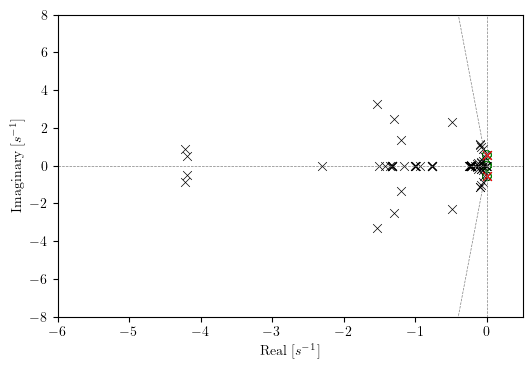

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:xlabel='Real [$s^{-1}$]', ylabel='Imaginary [$s^{-1}$]'>)

In [4]:
ssa.EIG.run()
ssa.EIG.plot()

In [5]:
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

Time step reduced to zero. Convergence is not likely.
Simulation terminated at t=0.0000 s.
TimeSeries does not contain any time stamp.


False

In [6]:
ssa.TDS.plt.plot(ssa.GENROU.omega)
ssa.TDS.plt.plot(ssa.REGCV1.omega)

IndexError: index 0 is out of bounds for axis 0 with size 0

Variable <Pe> contains no values, ignored.
No variables to plot.


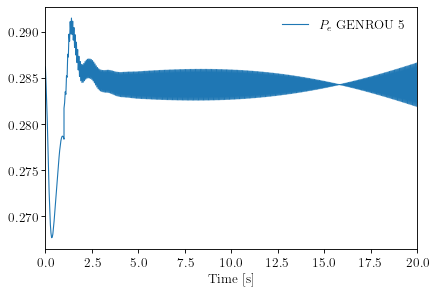

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [ ]:
ssa.TDS.plt.plot(ssa.REGCV1.Pe, hline1=0.1)

ssa.TDS.plt.plot(ssa.GENROU.Pe, a=4)

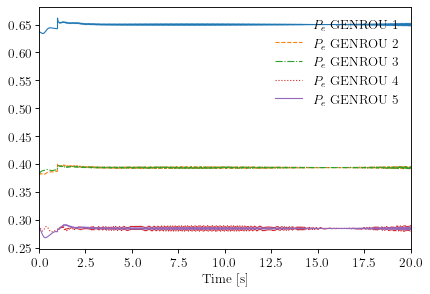

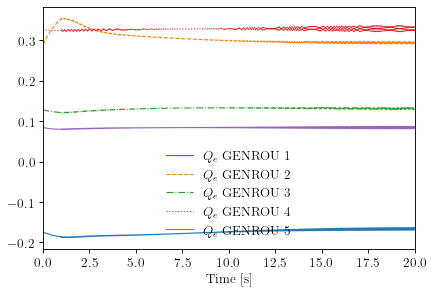

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [ ]:
ssa.TDS.plt.plot(ssa.GENROU.Pe)
ssa.TDS.plt.plot(ssa.GENROU.Qe)